In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import tensorflow as tf


# Loader le dataset

In [20]:
df = pd.read_csv('/fraud-workspace/Datasets/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-20-07-2023.csv')

In [21]:
pd.set_option('display.max_columns', None)
df.head(5)

,TransactionID_x,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M3,M4,M6,V3,V4,V5,V6,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V307,V309,V310,V312,V313,V314,V315,V317,V320,Year,Month,ID_client,NbTran_by_client,SunMontTran_by_client,MoyTran_by_client,MaxMontTran_by_client,MinMontTran_by_client,DiffTran_by_client
0,2987000,0,68.5,4,13926,150,1,142,1,315,87,16,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,0,13,0,13,13,0,1,2,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,1970,1,295783,1,68.50,68.50,68.50,68.50,0.00
1,2987001,0,29.0,4,2755,150,2,102,1,325,87,16,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,36952,45,23902.63,531.17,4592.02,25.95,4566.07
2,2987002,0,59.0,4,4663,150,3,166,2,330,87,35,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,315,315,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,78659,5,446.00,89.20,226.00,29.00,197.00
3,2987003,0,50.0,4,18132,150,2,117,2,476,87,53,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112,0,94,84,0,111,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,48,28,0,10,4,1,38,24,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,135.0,0,0,0,0,10,0,4,0,0,1,1,1,1,0,0,0,0,0,1758.0,0.0,354.0,135.0,0.0,0.0,0.0,1404.0,0.0,1970,1,392424,6,490.00,81.67,120.00,50.00,70.00
4,2987004,0,50.0,1,4497,150,2,102,1,420,87,16,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,75619,2,100.00,50.00,50.00,50.00,0.00


In [22]:
df_copie = df.copy()

In [23]:
df_copie.shape

(590540, 185)

In [24]:
# Separer X et y
y = df_copie['isFraud']
X = df_copie.drop(['isFraud'], axis=1)

In [25]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 184), (118108, 184), (472432,), (118108,))

In [26]:
#over_sampling sur les donnees d'entrainement

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911804, 184), (118108, 184), (911804,), (118108,))

In [27]:
# Normalisation des features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:

# Construction du modèle de Deep Learning en mode entonnoir
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Couche entonnoir
branch1 = tf.keras.layers.Dense(32, activation='relu')(x)
branch1 = tf.keras.layers.Dense(16, activation='relu')(branch1)
branch1 = tf.keras.layers.Dropout(0.2)(branch1)

branch2 = tf.keras.layers.Dense(64, activation='relu')(x)
branch2 = tf.keras.layers.Dense(16, activation='relu')(branch2)
branch2 = tf.keras.layers.Dropout(0.2)(branch2)

branch3 = tf.keras.layers.Dense(128, activation='relu')(x)
branch3 = tf.keras.layers.Dense(16, activation='relu')(branch3)
branch3 = tf.keras.layers.Dropout(0.2)(branch3)

branch4 = tf.keras.layers.Dense(256, activation='relu')(x)
branch4 = tf.keras.layers.Dense(16, activation='relu')(branch4)
branch4 = tf.keras.layers.Dropout(0.2)(branch4)

branch5 = tf.keras.layers.Dense(512, activation='relu')(x)
branch5 = tf.keras.layers.Dense(16, activation='relu')(branch5)
branch5 = tf.keras.layers.Dropout(0.2)(branch5)

# Concaténation des branches
concat = tf.keras.layers.concatenate([branch1, branch2, branch3, branch4, branch5 ])

# Couche de sortie
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)

# Création du modèle
model_DNN = tf.keras.Model(inputs=inputs, outputs=output)

# Compilation du modèle
model_DNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Afficher le sommaire de l'architecture de l'instant du modele genere precedemment
model_DNN.summary()

2023-08-09 00:51:47.771091: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22330 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:c3:00.0, compute capability: 8.6


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 184)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  94720     ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 512)                  0         ['dense[0][0]']               
                                                                                                  
 dense_1 (Dense)             (None, 256)                  131328    ['dropout[0][0]']             
                                                                                              

In [29]:
# Entraînement du modèle
history = model_DNN.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/10


2023-08-09 00:51:51.744916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-09 00:51:52.420753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1da512d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-09 00:51:52.420815: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-08-09 00:51:52.437969: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-09 00:51:52.601674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-09 00:51:52.748608: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1781/1781 [==============================] - 18s 7ms/step - loss: 0.2321 - auc: 0.9670 - val_loss: 0.1871 - val_auc: 0.8862
Epoch 2/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1682 - auc: 0.9821 - val_loss: 0.1846 - val_auc: 0.8925
Epoch 3/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1460 - auc: 0.9863 - val_loss: 0.1457 - val_auc: 0.8961
Epoch 4/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1329 - auc: 0.9885 - val_loss: 0.1444 - val_auc: 0.8983
Epoch 5/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1221 - auc: 0.9901 - val_loss: 0.1414 - val_auc: 0.9080
Epoch 6/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1160 - auc: 0.9910 - val_loss: 0.1254 - val_auc: 0.9099
Epoch 7/10
1781/1781 [==============================] - 12s 7ms/step - loss: 0.1096 - auc: 0.9918 - val_loss: 0.1141 - val_auc: 0.9118
Epoch 8/10
1781/1781 [==============================] - 12s 7ms/st

In [30]:
# Sauvegarder notre model
filename = '../Models_sauvegardes/model_DNN_25_06_2023.sav'
pickle.dump(model_DNN, open(filename, 'wb'))

In [31]:
# Évaluation du modèle sur les données de test
y_pred = model_DNN.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = model_DNN.evaluate(X_test, y_test)[1]
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

3691/3691 [==============================] - 9s 2ms/step - loss: 0.1034 - auc: 0.9175
Accuracy: 0.9175036549568176
AUC: 0.9199862692264399
F1-score: 0.5691725978647687
Precision: 0.5266515743980242
Recall: 0.6191628357125575


In [32]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[112367   1608]
 [  1741   2392]]


In [33]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tp, fp, fn, tn = matrix_threshold.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  112367
True Negative (TN):  2392
False Positive (FP):  1608
False Negative (FN):  1741


In [34]:
def plot_learning_curves(history):
    # Extraire les métriques d'apprentissage du modèle
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['auc']
    val_accuracy = history.history['val_auc']

    # Tracer les courbes de perte
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Tracer les courbes d'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training AUC')
    plt.plot(val_accuracy, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Training and Validation AUC')
    plt.legend()

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

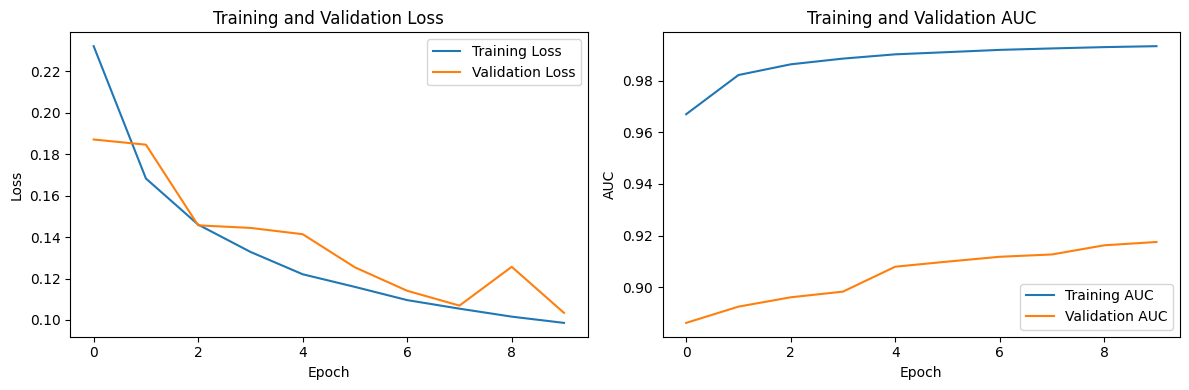

In [35]:
# Tracer les courbes d'apprentissage et de validation
plot_learning_curves(history)

In [36]:
# Évaluation du modèle sur les données de test
loss, auc = model_DNN.evaluate(X_test, y_test)
print("Loss:", loss)
print("AUC:", auc)

# Faire des prédictions avec le modèle
predictions = model_DNN.predict(X_test)

3691/3691 [==============================] - 9s 2ms/step - loss: 0.1034 - auc: 0.9175
Loss: 0.10343009978532791
AUC: 0.9175036549568176
3691/3691 [==============================] - 6s 2ms/step


In [37]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [38]:
# Convert the NumPy array to a Pandas Series
y_pred_binary_pd = pd.DataFrame(y_pred_binary)
y_pred_binary_pd

,0
0,0
1,0
2,0
3,0
4,0
...,...
118103,0
118104,0
118105,0
118106,0


In [39]:
# Renommer les colonnes
y_pred_binary_pd.columns =['Prediction']
y_pred_binary_pd.head(2)

,Prediction
0,0
1,0


In [40]:
# Renommer les colonnes
y_test_true = y_test
y_test_true.columns =['Valeur reelle']
y_test_true.head(2)


203495    0
227933    0
Name: isFraud, dtype: int64

In [41]:
# Copier les index dans une nouvelle colonne
index_col = y_test.reset_index().rename(columns={'index': 'index_col'})['index_col']
index_col

0         203495
1         227933
2         262769
3         388075
4          46351
           ...  
118103    124716
118104    338566
118105    390049
118106    380116
118107    175590
Name: index_col, Length: 118108, dtype: int64

In [42]:
#Modifier l'index des y_pred_binary_pd
y_pred_binary_pd = y_pred_binary_pd.set_index(pd.Index(index_col))
y_pred_binary_pd

,Prediction
index_col,
203495,0
227933,0
262769,0
388075,0
46351,0
...,...
124716,0
338566,0
390049,0


In [43]:
#Fusionner les y_test et y_pred_binary_pd
merged_df_pred = pd.merge(y_test, y_pred_binary_pd ,how ='left',left_index=True,right_index=True)
merged_df_pred.head(10)

,isFraud,Prediction
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
478711,0,0
572494,0,0
438755,0,0
65404,0,0
411744,0,0
